In [13]:
import pvlib
import pytz
import pandas

In [14]:
latitude = 34.427794
longitude =  -119.806768
timezone = 'US/Pacific'
location = pvlib.location.Location(latitude=latitude, 
                                   longitude=longitude, 
                                   name='HolyRomanCastle', 
                                   altitude=10,
                                   tz=timezone)

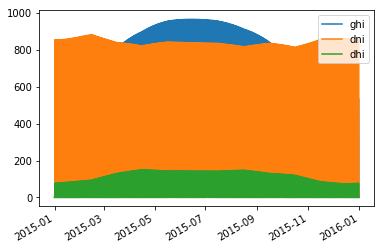

In [30]:
times = pandas.date_range(start='2015', end='2016', freq='1h',  tz=timezone)
weather = location.get_clearsky(times)
weather.plot()

In [26]:
module = pvlib.pvsystem.retrieve_sam('SandiaMod')['Canadian_Solar_CS5P_220M___2009_']
inverter = pvlib.pvsystem.retrieve_sam('cecinverter')['ABB__MICRO_0_25_I_OUTD_US_208__208V_']
temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

system = pvlib.pvsystem.PVSystem(module_parameters=module,
                                 inverter_parameters=inverter,
                                 temperature_model_parameters=temperature_model_parameters)

In [32]:
orientation_strategy = 'south_at_latitude_tilt'
model = pvlib.modelchain.ModelChain(system=system, location=location, orientation_strategy=orientation_strategy)
model.run_model(weather)

ModelChain: 
  name: None
  orientation_strategy: south_at_latitude_tilt
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

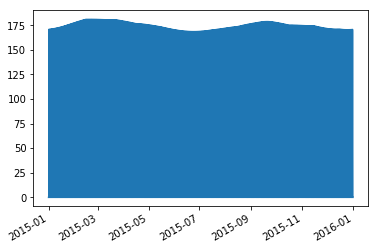

In [34]:
model.ac.plot()